# credit_risk_dataset -- Project(EDA & Feature Engineering)

In [1]:
# import Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"D:\Machine learning\credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA

In [4]:
df.info()
df.shape
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(32581, 12)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [5]:
df[df.duplicated()] # check for duplicate records in our dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [6]:
# Lets drop the duplicates
df.drop_duplicates(keep = 'first',inplace = True)

In [7]:
round(df.isna().sum()/len(df)*100) # check for percentage of null values

person_age                     0.0
person_income                  0.0
person_home_ownership          0.0
person_emp_length              3.0
loan_intent                    0.0
loan_grade                     0.0
loan_amnt                      0.0
loan_int_rate                 10.0
loan_status                    0.0
loan_percent_income            0.0
cb_person_default_on_file      0.0
cb_person_cred_hist_length     0.0
dtype: float64

 # Handling the missing values

**Two ways**
1. Drop the missing values

> If the percentage of missing values in a feature is more than 50% then you can drop those missing values

2. Fill the missing values
* For categorical - fill with `mode`
* For Numerical - fill with `mean` (if no outliers), `median` (if there are outliers)

**Lets check if there are outliers in features `person_emp_length` and `loan_int_rate`** using simple VIZ

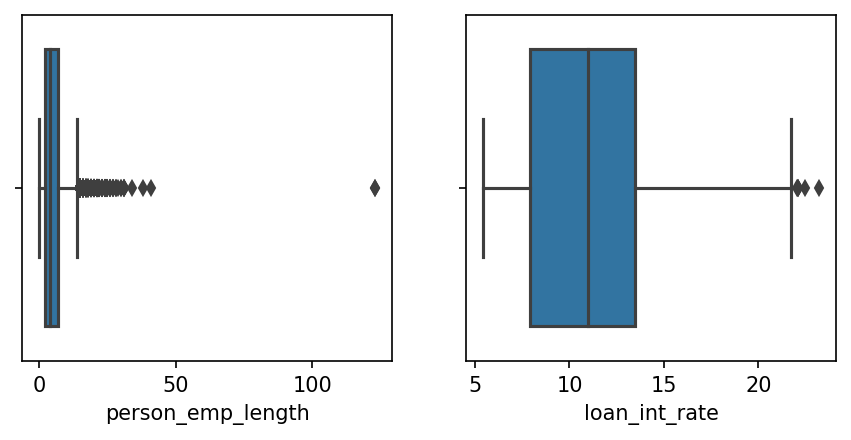

In [8]:
plt.figure(figsize=(7,3),dpi = 150)
plt.subplot(121)
sns.boxplot(x = 'person_emp_length', data = df)
plt.subplot(122)
sns.boxplot(x = 'loan_int_rate', data =df);

## Obsservation
* As we can observe there are outliers in our features so, lets fill them with median instead of mean. Because median is not impacted ny the outliers

In [9]:
# Lets fill the null values
df.person_emp_length.fillna(df.person_emp_length.median(), inplace = True)
df.loan_int_rate.fillna(df.loan_int_rate.median(), inplace = True)

In [10]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Lets Check outliers in our dataset

### Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [11]:
df.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

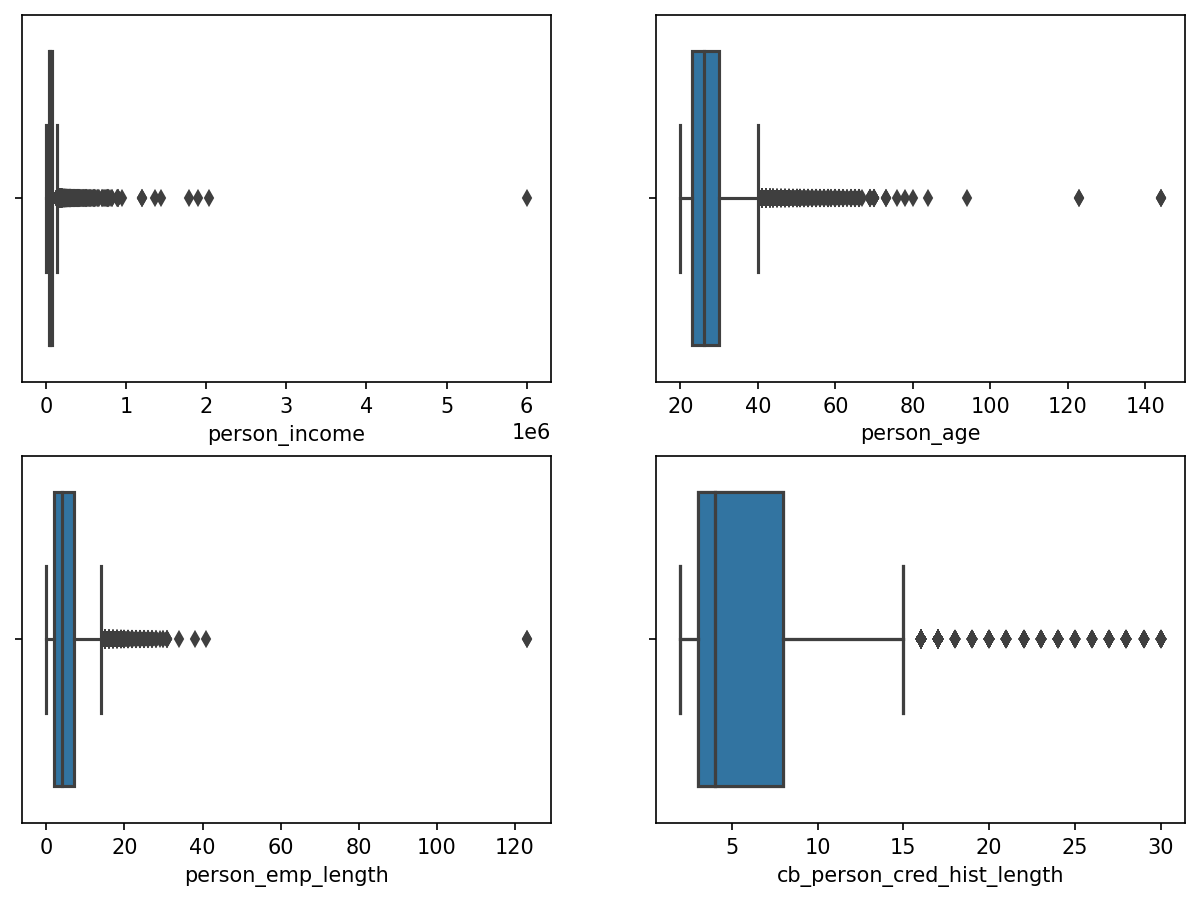

In [12]:
# Lets confirm the outliers through visualization
plt.figure(figsize=(10,7),dpi = 150)
plt.subplot(221)
sns.boxplot(x = 'person_income', data = df)
plt.subplot(222)
sns.boxplot(x ='person_age',data = df )
plt.subplot(223)
sns.boxplot(x ='person_emp_length',data = df)
plt.subplot(224)
sns.boxplot(x = 'cb_person_cred_hist_length',data = df)
plt.subplot(224)
sns.boxplot(x = 'cb_person_cred_hist_length',data = df);

# Outlier Treatment

* Now that we have detected the presence of outliers in our features, let's learn some well know techniques to tackle this issue.

**1.Winsorizing** 
* This Technique replaces the outliers with the data points that are closer to the rest of the `data distribution` meaning where most of the data lies☺.
* You can set a threshold and replace any data points beyond that `threshold` with the nearest non-outlier values.

**2.Data Transformation** 
* Using mathematical functions such as `log, cube root`, etc., to transform the data will reduce the impact of outliers by normalizing the data. This approach is particularly useful when we are having `skewed data`.

**3.Imputation**
* This Technique involves replacing the outliers with estimated values such as the `median, or other statistical values` to impute outlier values.

**4.Data Trimming**
* This approach eliminates the outliers completely resulting in substancially valuable information from the dataset. So this technique is a no go!!!. Don't ever go for this approach.

# Winsorization
* There are two prominant ways of applying winsorization
1. **Winsorization by percentiles:** You have to specify the percentage `(p)` of data that you want to replace, for example you set a percentage of 5%, 5% of the data will be replaced at both the ends top and bottom.

2. **Winsorization by standard deviation:** Calculate the mean and the standard deviation of the variable data, Then set a certain number of standard deviations (k) as the threshold. Values above `kσ` from the mean or below `-kσ` will be replaced.

## What values to replace the outliers with?
* After choosing one of the methods above, It's important that you need to decide what values to replace the outliers with.
1. **Truncate:** You can set the outlier values equal to the closest non-outlying value within the specified range. For example if you have a winsorization range of 5%, the top 5% of values will be replaced with the largest values within that range, and the bottom 5% will be replaced with the smallest values within the range.
2. **Winsorize:** You can set the outlier values equal to the values at boundary of the winsorization range. For example if you have a 5% winsorization, the top 5% of values will be replaced with the values at the 95th percentile, and the bottom 5% will be replaced with the values at the 5th percentile.

In [13]:
df.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.668217
loan_amnt                      1.191944
loan_int_rate                  0.220183
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

## Winsorization by percentiles

In [14]:
import scipy
from scipy.stats import mstats

In [15]:
#pip install --upgrade scipy

In [16]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [17]:
# insert a new columns to perform the winsorization methods
df.insert(1,'person_age_truncate',df.person_age)
df.insert(2,'person_age_winsorize',df.person_age)

In [18]:
df.head(2)

,person_age,person_age_truncate,person_age_winsorize,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,22,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,21,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [19]:
df.person_age_truncate = mstats.winsorize(df.person_age_truncate, limits=[0.10,0.10])

In [20]:
df.person_age_truncate

0        22
1        22
2        25
3        23
4        24
         ..
32576    36
32577    36
32578    36
32579    36
32580    36
Name: person_age_truncate, Length: 32416, dtype: int64

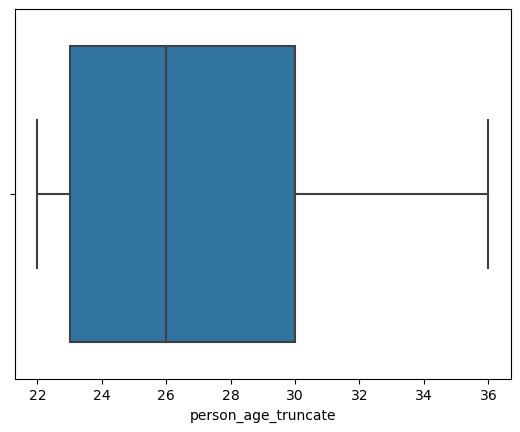

In [21]:
## Lets see whether the outliers now!!
sns.boxplot(x = 'person_age_truncate', data = df);

## Observation: 
* As you can see the outliers has been replaced.
* Most importantly `mstats.winsoroze` default method will be `truncate`, that means the outliers are replaced with closest non-outlying value within the specified range.

## How to apply winsorize method?

In [22]:
## lets do it
# Calculate the limits for winsorization using numpy -- np.percentile()
lower_limit = np.percentile(df.person_age, 10)
upper_limit = np.percentile(df.person_age, 90)

# Winsorize the data
df.person_age_winsorize[df.person_age_winsorize < lower_limit] = lower_limit
df.person_age_winsorize[df.person_age_winsorize > upper_limit] = upper_limit

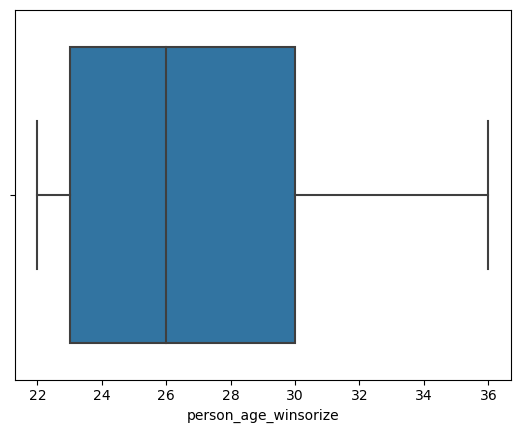

In [23]:
## Lets see whether the outliers now!!
sns.boxplot(x = 'person_age_winsorize', data = df);

## Obervation:
* As you can see the outliers has been replace by winsorize method.
* The better option to go with is the winsorize method not the truncate.

# Data Transformation Techiques
* Lets see the two most popular transformation techiques to tackle the impact of the outliers

## 1. Log transformation

* Logarithmic transformation is a mathematical operation that is performed on a variable or a feature in data analysis.
* The commonly known logarithmic transformations are `natural log base e` and `common log base 10`. 
* This technique compresses the data that has span a wide range of values into a smaller range, that dosen't mean it will eliminate the outliers completely.The outliers may still be persent but their affect will be reduced.

### Natural logarithmic transformation

In [24]:
# lets take the feature with maximum skewness.
df.person_income.skew()
# Lets apply the log transformation and check the impact of outliers
df.insert(4,'person_income_log',df.person_income)
import math
data = df.person_income_log
df.person_income_log = [math.log(x) for x in data]

32.95874828815014

In [25]:
df.head(4)

,person_age,person_age_truncate,person_age_winsorize,person_income,person_income_log,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,22,22,59000,10.985293,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,22,22,9600,9.169518,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,25,25,9600,9.169518,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,23,23,65500,11.089805,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2


0.1577119048511239


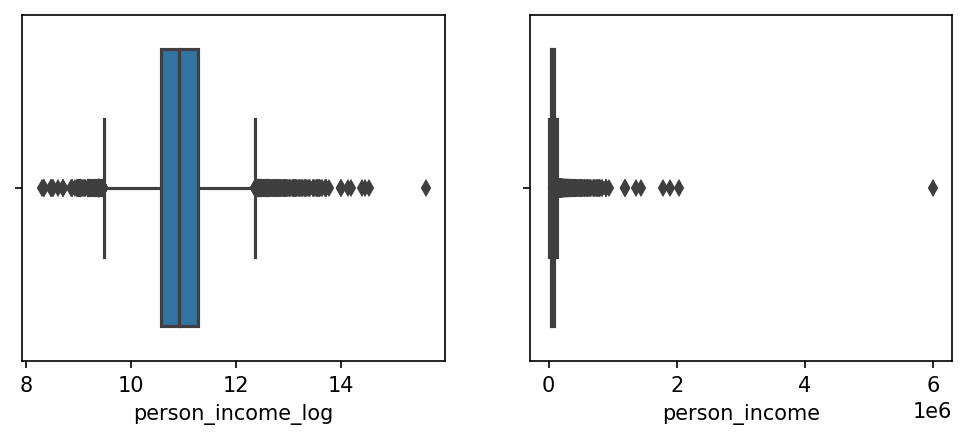

In [26]:
# Now lets check the skewness of the variable
print(df.person_income_log.skew()) # as you can observe the skewness has been reduced to minimal value
# lets see the outliers using VIZ
plt.figure(figsize=(8,3), dpi = 150)
plt.subplot(121)
sns.boxplot(x = 'person_income_log', data = df);
plt.subplot(122)
sns.boxplot(x = 'person_income', data = df);

### Common Log base 10

In [27]:
# lets take the feature with maximum skewness.
print(df.person_income.skew())
# Lets apply the log transformation and check the impact of outliers
df.insert(5,'person_income_log1',df.person_income)
import math
data = df.person_income_log1
df.person_income_log1 = [math.log10(x) for x in data]

32.95874828815014


In [28]:
df.head(4)

,person_age,person_age_truncate,person_age_winsorize,person_income,person_income_log,person_income_log1,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,22,22,59000,10.985293,4.770852,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,22,22,9600,9.169518,3.982271,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,25,25,9600,9.169518,3.982271,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,23,23,65500,11.089805,4.816241,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2


0.15771190485113093


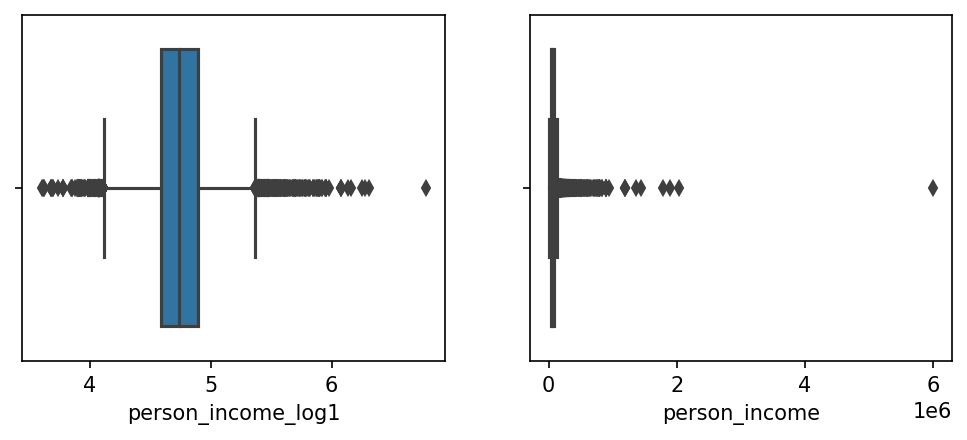

In [29]:
# Now lets check the skewness of the variable
print(df.person_income_log1.skew()) # as you can observe the skewness has been reduced to minimal value
# lets see the outliers using VIZ
plt.figure(figsize=(8,3), dpi = 150)
plt.subplot(121)
sns.boxplot(x = 'person_income_log1', data = df);
plt.subplot(122)
sns.boxplot(x = 'person_income', data = df);

## Box-Cox Transformation

- This transformation technique is used to stabilize the variance of a variable/feature in our data
- The transformation is defined by a power function that can be applied to the original data. 
- The general form of the Box-Cox transformation is:
>`Y(lambda) = (X^lambda - 1) / lambda`

In [33]:
df.cb_person_cred_hist_length.skew()
df.insert(3,'cb_hist_length_boxcox',df.cb_person_cred_hist_length)

1.6593687613558725

In [35]:
import scipy.stats as stats
df.cb_hist_length_boxcox, lamb = stats.boxcox(df.cb_hist_length_boxcox)

0.0614922288674664


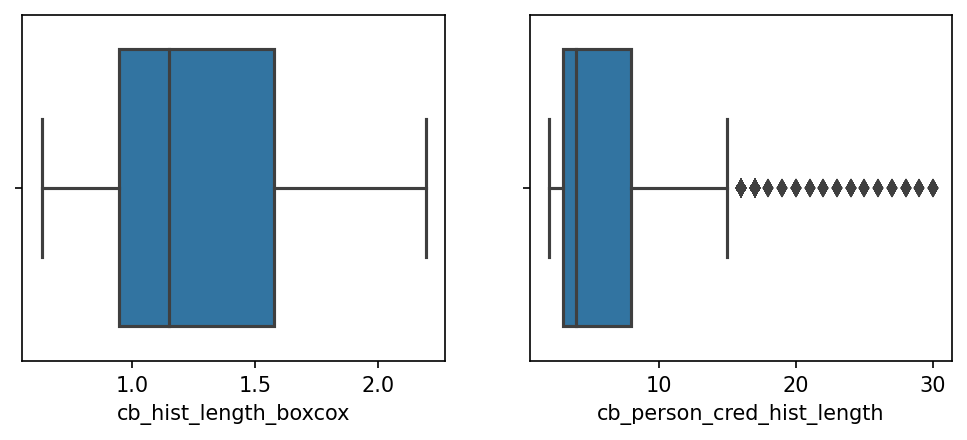

In [38]:
# Now lets check the skewness of the variable
print(df.cb_hist_length_boxcox.skew()) # as you can observe the skewness has been reduced to minimal value
# lets see the outliers using VIZ
plt.figure(figsize=(8,3), dpi = 150)
plt.subplot(121)
sns.boxplot(x = 'cb_hist_length_boxcox', data = df);
plt.subplot(122)
sns.boxplot(x = 'cb_person_cred_hist_length', data = df);

## Feature Engineering 

**Feature engineering is the process of Data Transformation (Raw Data) into meaningful features that can be used to train machine learning models. It has three forms:**
1. Feature Selection
2. Feature Extraction or creation
3. Feature Transformation

**Let's check Multi-Collinearity between input numerical features using feature selection**

## Variance Inflation Factor (VIF)

The VIF is calculated as` 1 / (1 - R^2)`, where R^2 is the coefficient of determination of the regression model.

**VIF gives a variance value for each feature in our data**
- if variance value 0-4 - it means there is low multi-collinearity
- if variance value 4-8 - it means there is medium multi-collinearity
- if variance value above 8 - it means there is high multi-collinearity features --> Should be removed

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
df.dtypes

person_age                      int64
person_age_truncate             int64
person_age_winsorize            int64
cb_hist_length_boxcox         float64
person_income                   int64
person_income_log             float64
person_income_log1            float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [41]:
df1 = df.select_dtypes(include = ['int64','float64'])

In [42]:
vif = pd.DataFrame()
vif['features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,person_age,181.39
1,person_age_truncate,inf
2,person_age_winsorize,inf
3,cb_hist_length_boxcox,78.56
4,person_income,3.41
5,person_income_log,inf
6,person_income_log1,inf
7,person_emp_length,2.53
8,loan_amnt,7.28
9,loan_int_rate,15.46


In [43]:
# If you observe, clearly the boxcox transformation is eliminating the outliers but it is having a huge value for variance
# It indicates the feature is having high multi-collinearity

## RFE - Recursive Feature Elimination

* This is a feature selection method used in feature engineering to identify the most relevant features in our data. Choose the appropriate estimater which completely depends on your EDA, the data and the problem statement you are dealing with.
* RFE works by iteratively eliminating the least important features based on the estimator's coefficients or feature importances. The process continues until the specified number of features is reached.
* Linear regression, logistic regression, and decision trees are commonly used, but you can explore other models as well.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [58]:
estimator = LinearRegression()
rfe = RFE(estimator= estimator, n_features_to_select=6, verbose=1)

In [59]:
X = df1
y = df.loan_status

In [60]:
rfe = rfe.fit(X, y)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


In [61]:
temp_df = pd.DataFrame({'Columns' : X.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,person_age,False,6
1,person_age_truncate,True,1
2,person_age_winsorize,True,1
3,cb_hist_length_boxcox,True,1
4,person_income,False,8
5,person_income_log,True,1
6,person_income_log1,True,1
7,person_emp_length,False,5
8,loan_amnt,False,7
9,loan_int_rate,False,2


* RFE gives us ranking and support - if we want 6 important features from our data it gives us the top 6 important features from our data by giving them the rank as 1 and support as True, the remaining features will be given starting from rank 2 to remaining and termed as un-important.